# TF-IDF

Wiki Sagt: Das Tf-idf-Maß (von englisch term frequency ‚Vorkommenshäufigkeit‘ und inverse document frequency ‚inverse Dokumenthäufigkeit‘) wird im Information Retrieval zur Beurteilung der Relevanz von Termen in Dokumenten einer Dokumentenkollektion eingesetzt.

Ich sage:
Ein Maß dafür wie relevant ein Wort für ein Dokument ist. 
- TF: Wie oft kommt das Wort vor? 
- DF: Wie oft kommt Wort im Dokument vor?
- Ein Quotient daraus gibt Wörtern die "charakeristisch" für ein Dokuement sind eine "höhere" Gewichtung. 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Einfaches Beispiel

In [17]:
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform(["I'd like an apple",
                            "An apple a day keeps the doctor away",
                            "Never compare an apple to an orange",
                            "I prefer scikit-learn to Orange"])
apples_matrix = (tfidf * tfidf.T).A
apples_matrix

array([[1.        , 0.25082859, 0.39482963, 0.        ],
       [0.25082859, 1.        , 0.22057609, 0.        ],
       [0.39482963, 0.22057609, 1.        , 0.26264139],
       [0.        , 0.        , 0.26264139, 1.        ]])

# Visualisierung

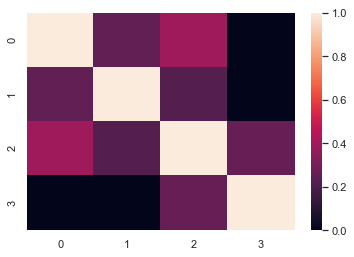

In [18]:
%matplotlib inline
import seaborn as sns; sns.set()
ax = sns.heatmap(apples_matrix)

# Für Dokumente mit Processing

In [21]:
import nltk, string

text_files = ["godfather.txt", "schindlers_list.txt", "shawnshank.txt"]
documents = [open(f).read() for f in text_files]

# Stemming
stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

#Remove punctuaction, stem
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english').fit_transform(documents)

# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = vectorizer * vectorizer.T
pairwise_similarity.A

array([[1.        , 0.09018803, 0.13309666],
       [0.09018803, 1.        , 0.10352998],
       [0.13309666, 0.10352998, 1.        ]])

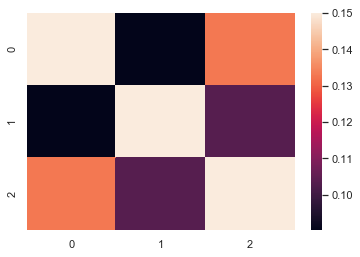

In [23]:
import seaborn as sns; sns.set()
ax = sns.heatmap(pairwise_similarity.A,vmax=0.15)